<a href="https://colab.research.google.com/github/StellaShabin/Flask/blob/main/Insurance_Cost_prediction_89_RF.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
from google.colab import files
import pandas as pd

# Prompt to upload the file
uploaded = files.upload()



Saving insurance (1).csv to insurance (1) (1).csv


In [4]:

df = pd.read_csv('insurance (1).csv')

# Display the first few rows
df.head()


,Age,Diabetes,BloodPressureProblems,AnyTransplants,AnyChronicDiseases,Height,Weight,KnownAllergies,HistoryOfCancerInFamily,NumberOfMajorSurgeries,PremiumPrice
0,45,0,0,0,0,155,57,0,0,0,25000
1,60,1,0,0,0,180,73,0,0,0,29000
2,36,1,1,0,0,158,59,0,0,1,23000
3,52,1,1,0,1,183,93,0,0,2,28000
4,38,0,0,0,1,166,88,0,0,1,23000


In [6]:
df['BMI']=(df['Weight']/((df['Height']*100)*(df['Height']*100)))*10**8
df

,Age,Diabetes,BloodPressureProblems,AnyTransplants,AnyChronicDiseases,Height,Weight,KnownAllergies,HistoryOfCancerInFamily,NumberOfMajorSurgeries,PremiumPrice,BMI
0,45,0,0,0,0,155,57,0,0,0,25000,23.725286
1,60,1,0,0,0,180,73,0,0,0,29000,22.530864
2,36,1,1,0,0,158,59,0,0,1,23000,23.634033
3,52,1,1,0,1,183,93,0,0,2,28000,27.770313
4,38,0,0,0,1,166,88,0,0,1,23000,31.934969
...,...,...,...,...,...,...,...,...,...,...,...,...
981,18,0,0,0,0,169,67,0,0,0,15000,23.458562
982,64,1,1,0,0,153,70,0,0,3,28000,29.903029
983,56,0,1,0,0,155,71,0,0,1,29000,29.552549
984,47,1,1,0,0,158,73,1,0,1,39000,29.242109


##DIABETES VS PREMIUM PRICE


*   Box plot
*   Check Normality of each category using:
       Histogram/KDE plot,
       QQ plot,
       Statistical test





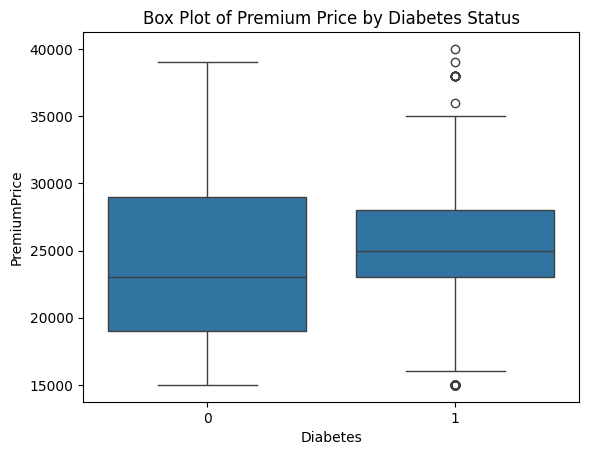

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt
#plt.figure(figsize=(8, 6))
sns.boxplot(x='Diabetes', y='PremiumPrice', data=df)
plt.title('Box Plot of Premium Price by Diabetes Status')
plt.show()


In [8]:
premium_with_diabetes=df[df['Diabetes']==1]['PremiumPrice']
premium_without_diabetes=df[df['Diabetes']==0]['PremiumPrice']

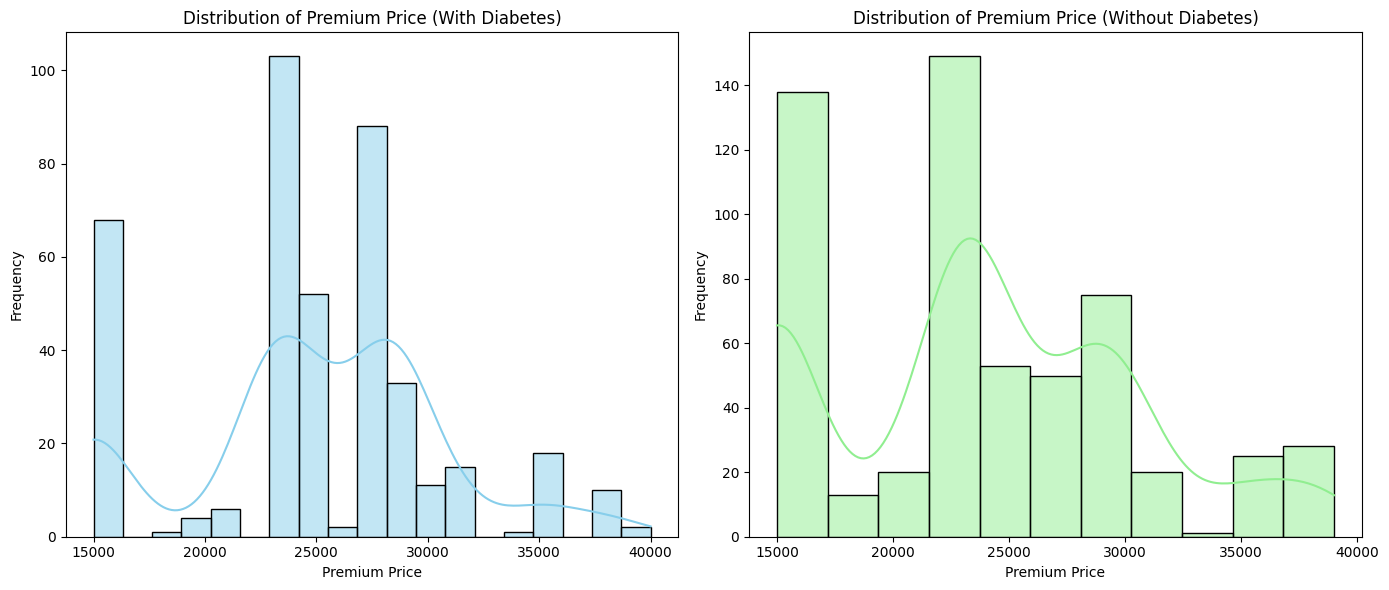

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the figure size
plt.figure(figsize=(14, 6))

# Plot histogram for premium prices with diabetes
plt.subplot(1, 2, 1)  # 1 row, 2 columns, 1st plot
sns.histplot(premium_with_diabetes, kde=True, color='skyblue')
plt.title('Distribution of Premium Price (With Diabetes)')
plt.xlabel('Premium Price')
plt.ylabel('Frequency')

# Plot histogram for premium prices without diabetes
plt.subplot(1, 2, 2)  # 1 row, 2 columns, 2nd plot
sns.histplot(premium_without_diabetes, kde=True, color='lightgreen')
plt.title('Distribution of Premium Price (Without Diabetes)')
plt.xlabel('Premium Price')
plt.ylabel('Frequency')

# Show the plots
plt.tight_layout()  # Adjusting subplots to fit into the figure area
plt.show()


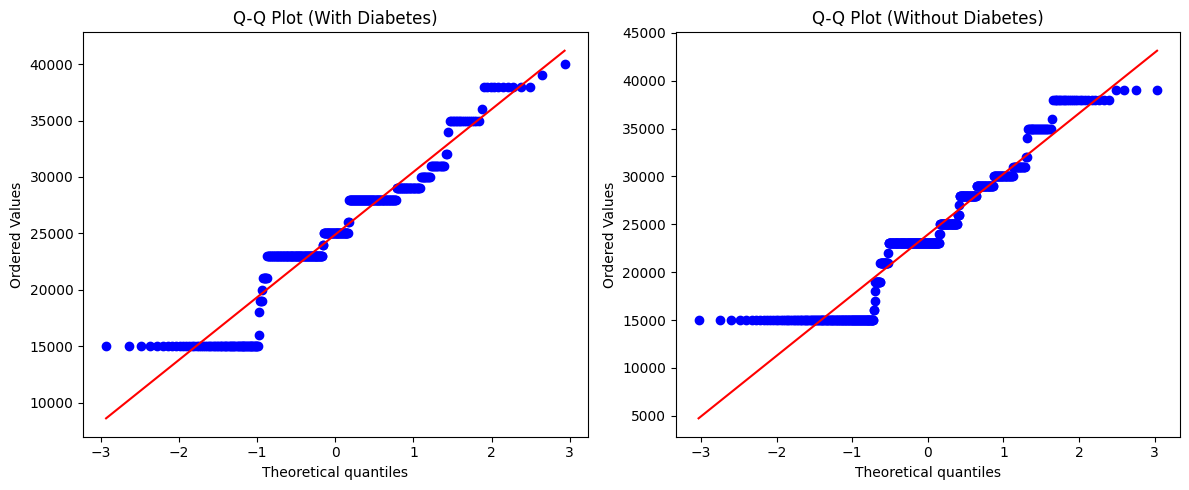

In [10]:
import scipy.stats as stats

# Q-Q plot for premium prices with diabetes
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)  # 1 row, 2 columns, 1st plot
stats.probplot(premium_with_diabetes, dist="norm", plot=plt)
plt.title('Q-Q Plot (With Diabetes)')

# Q-Q plot for premium prices without diabetes
plt.subplot(1, 2, 2)  # 1 row, 2 columns, 2nd plot
stats.probplot(premium_without_diabetes, dist="norm", plot=plt)
plt.title('Q-Q Plot (Without Diabetes)')

# Show the plots
plt.tight_layout()
plt.show()


In [11]:
from scipy.stats import shapiro

# Shapiro-Wilk test for premium prices with diabetes
shapiro_with_diabetes_statistic, shapiro_with_diabetes_pvalue = shapiro(premium_with_diabetes)
print("Shapiro-Wilk Test (With Diabetes):", shapiro_with_diabetes_pvalue)

# Shapiro-Wilk test for premium prices without diabetes
shapiro_without_diabetes_statistic, shapiro_without_diabetes_pvalue=shapiro(premium_without_diabetes)
print("Shapiro-Wilk Test (Without Diabetes):", shapiro_without_diabetes_pvalue)

if shapiro_with_diabetes_pvalue<0.05:
  print("Data is not normally distributed for diabetes patients")
else:
  print("Data is normally distributed for diabetes patients")
if shapiro_without_diabetes_pvalue<0.05:
  print("Data is not normally distributed for patients with No diabetes")
else:
  print("Data is normally distributed for patients with No diabetes")

Shapiro-Wilk Test (With Diabetes): 9.530847250043672e-14
Shapiro-Wilk Test (Without Diabetes): 8.942543496095571e-17
Data is not normally distributed for diabetes patients
Data is not normally distributed for patients with No diabetes


In [12]:
from scipy.stats import mannwhitneyu
u_stat, p_value=mannwhitneyu(premium_with_diabetes,premium_without_diabetes)
if p_value<0.05:
  print("Reject Null Hypothesis. There is significant difference in premium price between diabetic patients and non-diabetic patients")
else:
  print("Fail to Reject Null Hypothesis. There is no significant difference in premium price between diabetic patients and non-diabetic patients")

Reject Null Hypothesis. There is significant difference in premium price between diabetic patients and non-diabetic patients


In [13]:
from sklearn.linear_model import LinearRegression
import pandas as pd

# Assuming your dataset has 'Diabetes' as 0 (non-diabetic) or 1 (diabetic)
X = df[['Diabetes']]  # Independent variable (binary)
y = df['PremiumPrice']  # Dependent variable (premium price)

# Initialize model
model = LinearRegression()

# Fit model
model.fit(X, y)

# Get the coefficient (slope) for diabetes
print(f"Coefficient for Diabetes: {model.coef_}")

# Evaluate the model
y_pred = model.predict(X)
print(f"R^2 score: {model.score(X, y)}")


Coefficient for Diabetes: [964.31708388]
R^2 score: 0.005807848407077487


Interpretation:
The result shows that diabetes might have a small effect on premium prices, but it is not a strong predictor.
The low R² score indicates that the relationship is weak and that other variables likely have a much larger influence on premium prices.

##ANY TRANSPLANTS VS PREMIUM PRICE
   

*   box plot
*   checking normality of each category using: histogram/KDE plot, QQ plot
*   Statistical Test










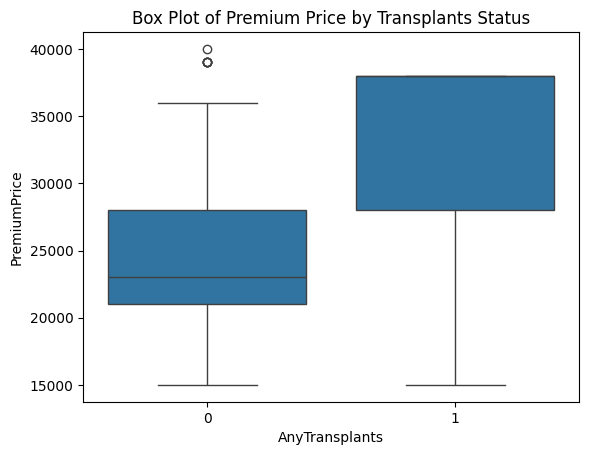

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt
#plt.figure(figsize=(8, 6))
sns.boxplot(x='AnyTransplants', y='PremiumPrice', data=df)
plt.title('Box Plot of Premium Price by Transplants Status')
plt.show()


In [15]:
premium_with_Transplant=df[df['AnyTransplants']==1]['PremiumPrice']
premium_without_Transplant=df[df['AnyTransplants']==0]['PremiumPrice']

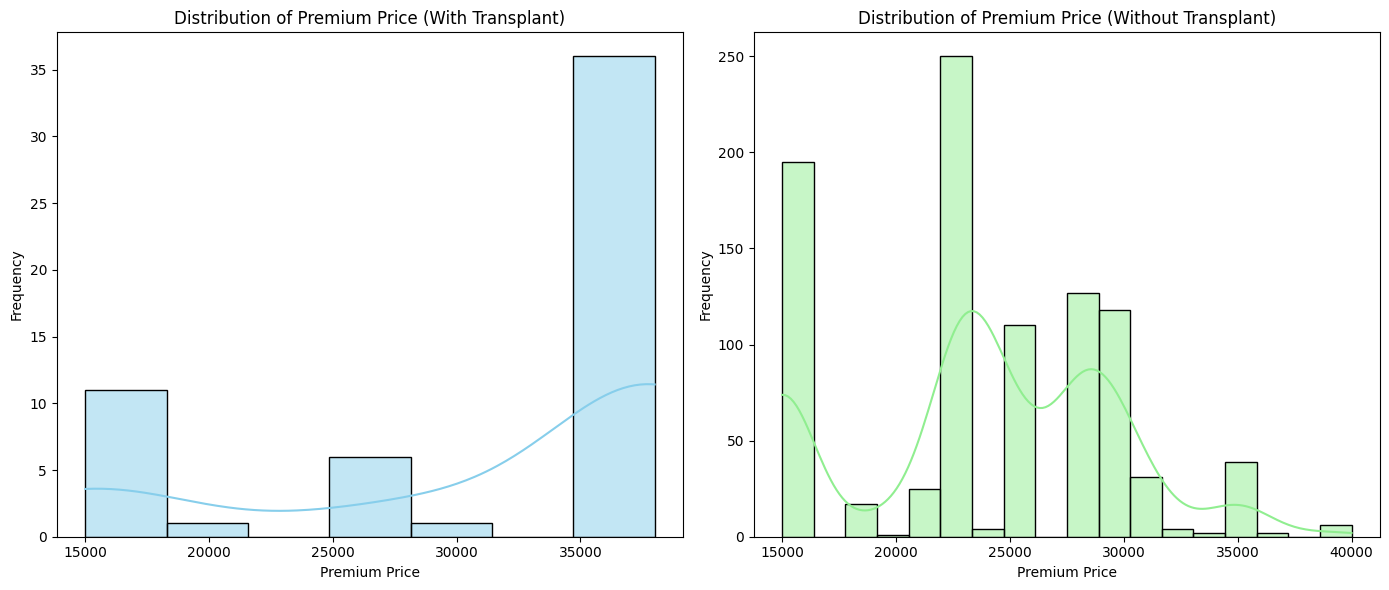

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the figure size
plt.figure(figsize=(14, 6))

# Plot histogram for premium prices with Transplant
plt.subplot(1, 2, 1)  # 1 row, 2 columns, 1st plot
sns.histplot(premium_with_Transplant, kde=True, color='skyblue')
plt.title('Distribution of Premium Price (With Transplant)')
plt.xlabel('Premium Price')
plt.ylabel('Frequency')

# Plot histogram for premium prices without Transplant
plt.subplot(1, 2, 2)  # 1 row, 2 columns, 2nd plot
sns.histplot(premium_without_Transplant, kde=True, color='lightgreen')
plt.title('Distribution of Premium Price (Without Transplant)')
plt.xlabel('Premium Price')
plt.ylabel('Frequency')

# Show the plots
plt.tight_layout()  # Adjusting subplots to fit into the figure area
plt.show()


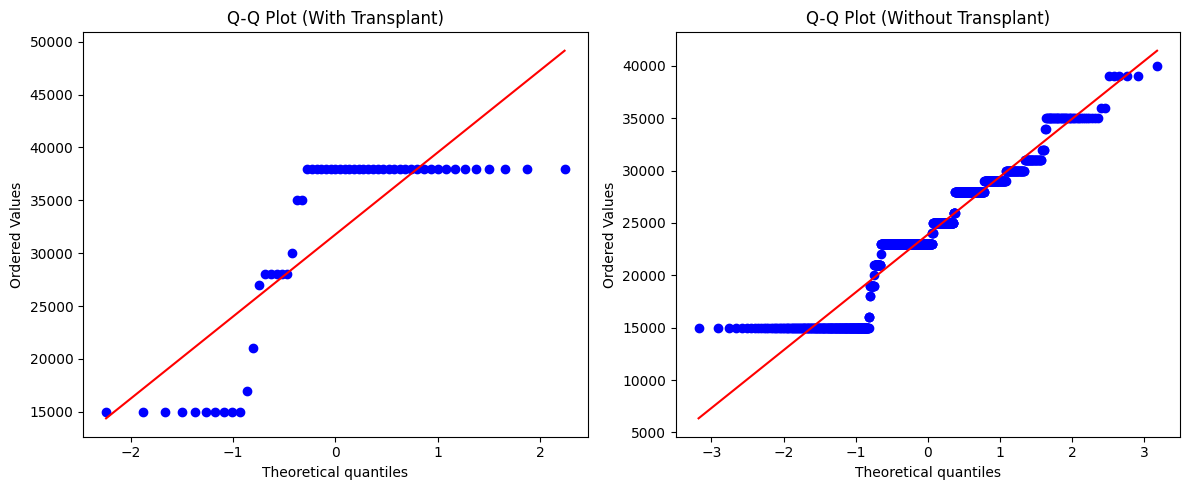

In [17]:
import scipy.stats as stats

# Q-Q plot for premium prices with Transplant
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)  # 1 row, 2 columns, 1st plot
stats.probplot(premium_with_Transplant, dist="norm", plot=plt)
plt.title('Q-Q Plot (With Transplant)')

# Q-Q plot for premium prices without Transplant
plt.subplot(1, 2, 2)  # 1 row, 2 columns, 2nd plot
stats.probplot(premium_without_Transplant, dist="norm", plot=plt)
plt.title('Q-Q Plot (Without Transplant)')

# Show the plots
plt.tight_layout()
plt.show()


In [18]:
from scipy.stats import shapiro

# Shapiro-Wilk test for premium prices with Transplant
shapiro_with_Transplant_statistic, shapiro_with_Transplant_pvalue = shapiro(premium_with_Transplant)
print("Shapiro-Wilk Test (With Transplant):", shapiro_with_Transplant_pvalue)

# Shapiro-Wilk test for premium prices without Transplant
shapiro_without_Transplant_statistic, shapiro_without_Transplant_pvalue=shapiro(premium_without_Transplant)
print("Shapiro-Wilk Test (Without Transplant):", shapiro_without_Transplant_pvalue)

if shapiro_with_Transplant_pvalue<0.05:
  print("Data is not normally distributed for Transplant patients")
else:
  print("Data is normally distributed for Transplant patients")
if shapiro_without_Transplant_pvalue<0.05:
  print("Data is not normally distributed for patients with No Transplant")
else:
  print("Data is normally distributed for patients with No Transplant")

Shapiro-Wilk Test (With Transplant): 5.783799004810026e-10
Shapiro-Wilk Test (Without Transplant): 9.717455763577416e-22
Data is not normally distributed for Transplant patients
Data is not normally distributed for patients with No Transplant


In [19]:
from scipy.stats import mannwhitneyu
u_stat, p_value=mannwhitneyu(premium_with_Transplant,premium_without_Transplant)
if p_value<0.05:
  print("Reject Null Hypothesis. There is significant difference in premium price between Transplant patients and no transplant patients")
else:
  print("Fail to Reject Null Hypothesis. There is no significant difference in premium price between Transplant patients and no Transplant patients")

Reject Null Hypothesis. There is significant difference in premium price between Transplant patients and no transplant patients


In [20]:
from sklearn.linear_model import LinearRegression
import pandas as pd

X = df[['AnyTransplants']]  # Independent variable (binary)
y = df['PremiumPrice']  # Dependent variable (premium price)

# Initialize model
model = LinearRegression()

# Fit model
model.fit(X, y)

# Get the coefficient (slope) for Transplants
print(f"Coefficient for Transplant: {model.coef_}")

# Evaluate the model
y_pred = model.predict(X)
print(f"R^2 score: {model.score(X, y)}")


Coefficient for Transplant: [7865.67717996]
R^2 score: 0.08355333469379012


Interpretation:
The result shows that Transplant might have a small effect on premium prices, but it is not a strong predictor.
The low R² score indicates that the relationship is weak and that other variables  likely have a much larger influence on premium prices.

##BLOOD PRESSURE PROBLEMS VS PREMIUM PRICE


*   box plot
*   checking normality of each category using: histogram/KDE plot, QQ plot
*   Statistical Test





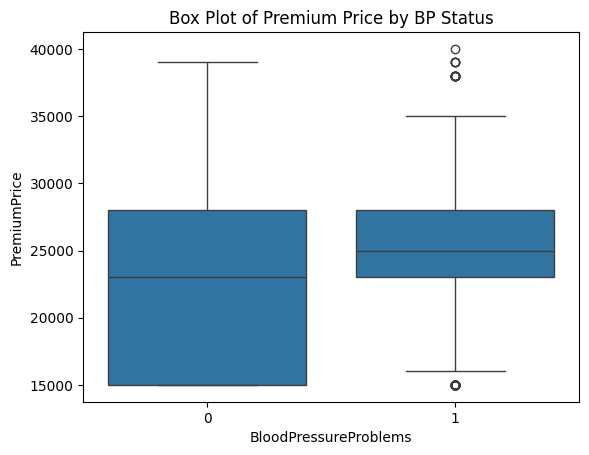

In [21]:
import seaborn as sns
import matplotlib.pyplot as plt
#plt.figure(figsize=(8, 6))
sns.boxplot(x='BloodPressureProblems', y='PremiumPrice', data=df)
plt.title('Box Plot of Premium Price by BP Status')
plt.show()


In [22]:
premium_with_BP=df[df['BloodPressureProblems']==1]['PremiumPrice']
premium_without_BP=df[df['BloodPressureProblems']==0]['PremiumPrice']

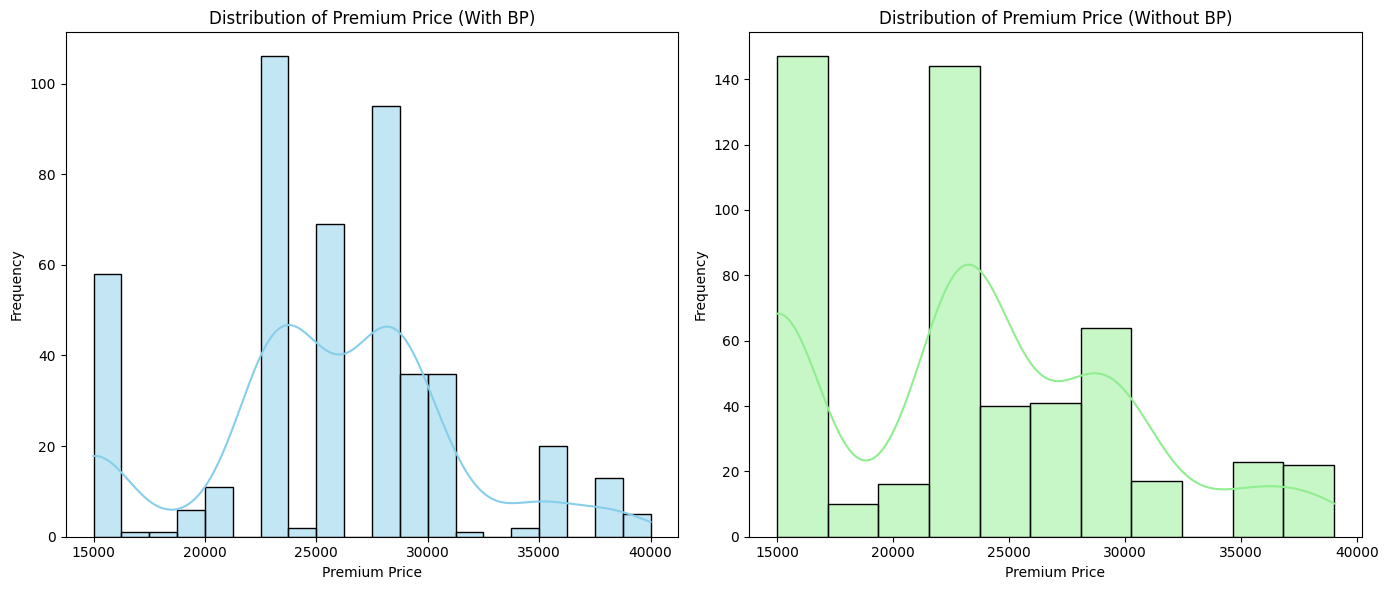

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the figure size
plt.figure(figsize=(14, 6))

# Plot histogram for premium prices with BP
plt.subplot(1, 2, 1)  # 1 row, 2 columns, 1st plot
sns.histplot(premium_with_BP, kde=True, color='skyblue')
plt.title('Distribution of Premium Price (With BP)')
plt.xlabel('Premium Price')
plt.ylabel('Frequency')

# Plot histogram for premium prices without BP
plt.subplot(1, 2, 2)  # 1 row, 2 columns, 2nd plot
sns.histplot(premium_without_BP, kde=True, color='lightgreen')
plt.title('Distribution of Premium Price (Without BP)')
plt.xlabel('Premium Price')
plt.ylabel('Frequency')

# Show the plots
plt.tight_layout()  # Adjusting subplots to fit into the figure area
plt.show()


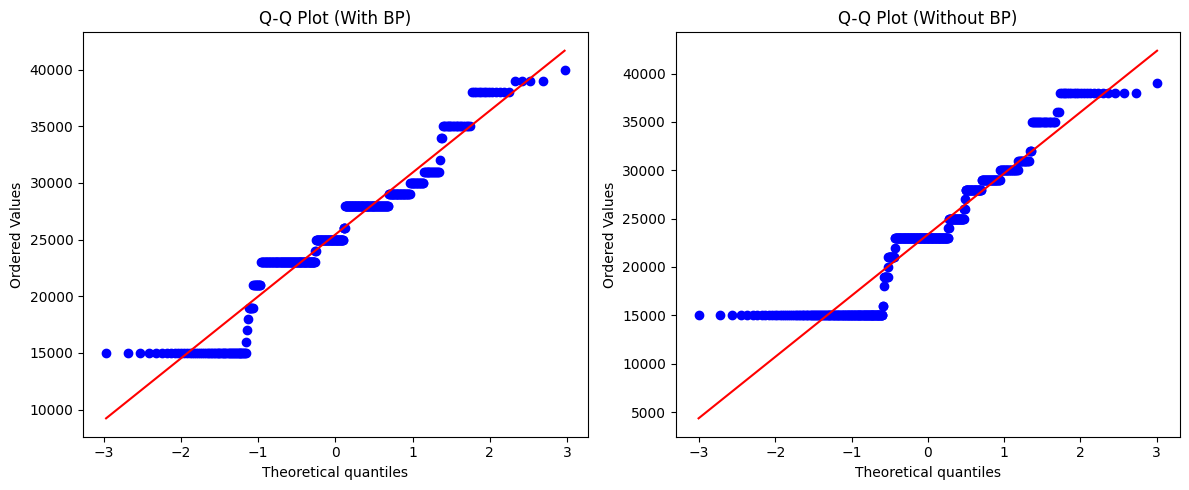

In [24]:
import scipy.stats as stats

# Q-Q plot for premium prices with BP
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)  # 1 row, 2 columns, 1st plot
stats.probplot(premium_with_BP, dist="norm", plot=plt)
plt.title('Q-Q Plot (With BP)')

# Q-Q plot for premium prices without BP
plt.subplot(1, 2, 2)  # 1 row, 2 columns, 2nd plot
stats.probplot(premium_without_BP, dist="norm", plot=plt)
plt.title('Q-Q Plot (Without BP)')

# Show the plots
plt.tight_layout()
plt.show()


In [25]:
from scipy.stats import shapiro

# Shapiro-Wilk test for premium prices with BP
shapiro_with_BP_statistic, shapiro_with_BP_pvalue = shapiro(premium_with_BP)
print("Shapiro-Wilk Test (With BP):", shapiro_with_BP_pvalue)

# Shapiro-Wilk test for premium prices without BP
shapiro_without_BP_statistic, shapiro_without_BP_pvalue=shapiro(premium_without_BP)
print("Shapiro-Wilk Test (Without BP):", shapiro_without_BP_pvalue)

if shapiro_with_BP_pvalue<0.05:
  print("Data is not normally distributed for BP patients")
else:
  print("Data is normally distributed for BP patients")
if shapiro_without_BP_pvalue<0.05:
  print("Data is not normally distributed for patients with No BP")
else:
  print("Data is normally distributed for patients with No BP")

Shapiro-Wilk Test (With BP): 2.705372089185887e-13
Shapiro-Wilk Test (Without BP): 1.807804224860933e-17
Data is not normally distributed for BP patients
Data is not normally distributed for patients with No BP


In [26]:
from scipy.stats import mannwhitneyu
u_stat, p_value=mannwhitneyu(premium_with_BP,premium_without_BP)
if p_value<0.05:
  print("Reject Null Hypothesis. There is significant difference in premium price between BP patients and non-BP patients")
else:
  print("Fail to Reject Null Hypothesis. There is no significant difference in premium price between BP patients and non-BP patients")

Reject Null Hypothesis. There is significant difference in premium price between BP patients and non-BP patients


In [27]:
from sklearn.linear_model import LinearRegression
import pandas as pd


X = df[['BloodPressureProblems']]  # Independent variable (binary)
y = df['PremiumPrice']  # Dependent variable (premium price)

# Initialize model
model = LinearRegression()

# Fit model
model.fit(X, y)

# Get the coefficient (slope) for BP
print(f"Coefficient for BP: {model.coef_}")

# Evaluate the model
y_pred = model.predict(X)
print(f"R^2 score: {model.score(X, y)}")


Coefficient for BP: [2091.18171904]
R^2 score: 0.02792132286164073


Interpretation:
The result shows that BP might have a small effect on premium prices, but it is not a strong predictor.
The low R² score indicates that the relationship is weak and that other variables likely have a much larger influence on premium prices.

##ANY CHRONIC DISEASE VS PREMIUM PRICE

*   box plot
*   checking normality of each category using: histogram/KDE plot, QQ plot
*   Statistical TesT




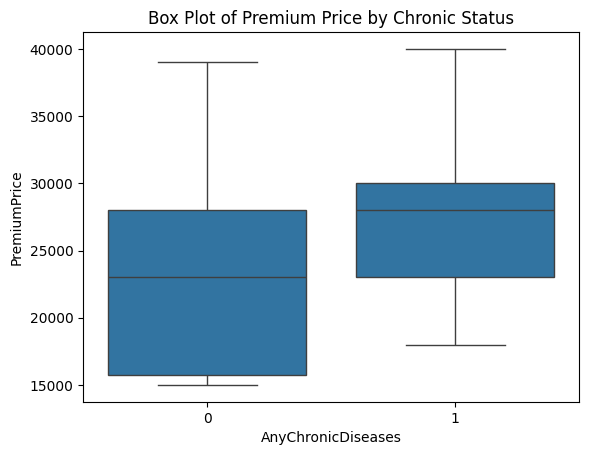

In [28]:
import seaborn as sns
import matplotlib.pyplot as plt
#plt.figure(figsize=(8, 6))
sns.boxplot(x='AnyChronicDiseases', y='PremiumPrice', data=df)
plt.title('Box Plot of Premium Price by Chronic Status')
plt.show()


In [29]:
premium_with_Chronic=df[df['AnyChronicDiseases']==1]['PremiumPrice']
premium_without_Chronic=df[df['AnyChronicDiseases']==0]['PremiumPrice']

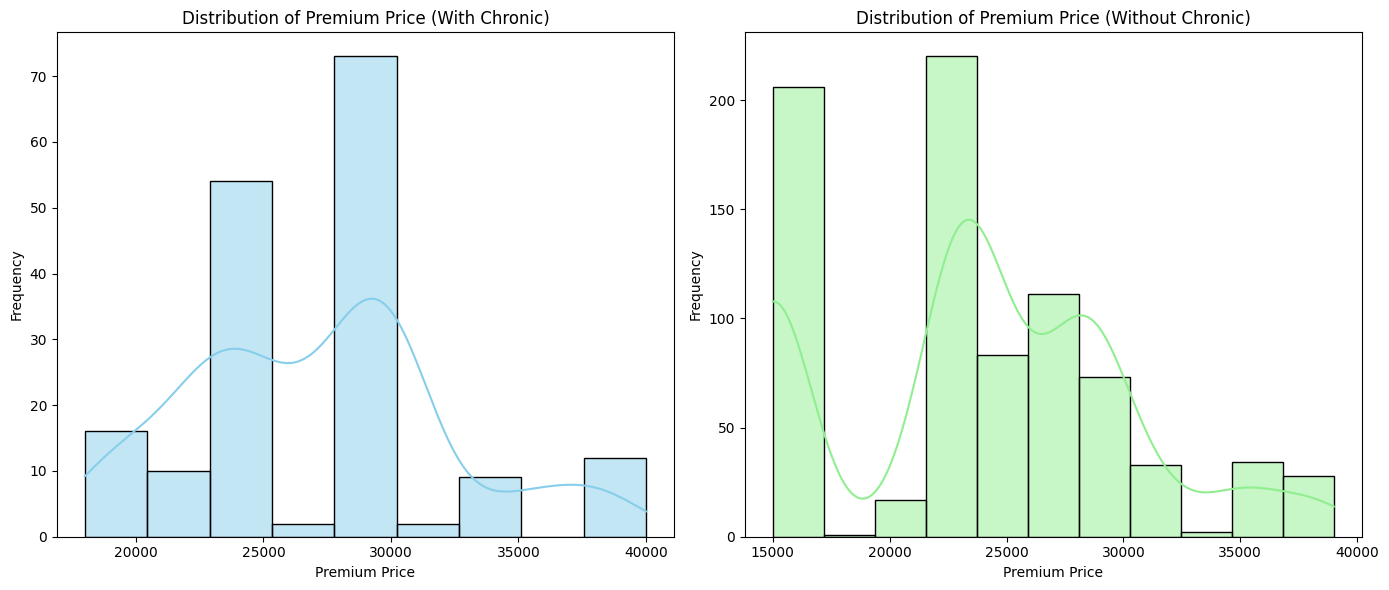

In [30]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the figure size
plt.figure(figsize=(14, 6))

# Plot histogram for premium prices with Chronic Disease
plt.subplot(1, 2, 1)  # 1 row, 2 columns, 1st plot
sns.histplot(premium_with_Chronic, kde=True, color='skyblue')
plt.title('Distribution of Premium Price (With Chronic)')
plt.xlabel('Premium Price')
plt.ylabel('Frequency')

# Plot histogram for premium prices without Chronic
plt.subplot(1, 2, 2)  # 1 row, 2 columns, 2nd plot
sns.histplot(premium_without_Chronic, kde=True, color='lightgreen')
plt.title('Distribution of Premium Price (Without Chronic)')
plt.xlabel('Premium Price')
plt.ylabel('Frequency')

# Show the plots
plt.tight_layout()  # Adjusting subplots to fit into the figure area
plt.show()


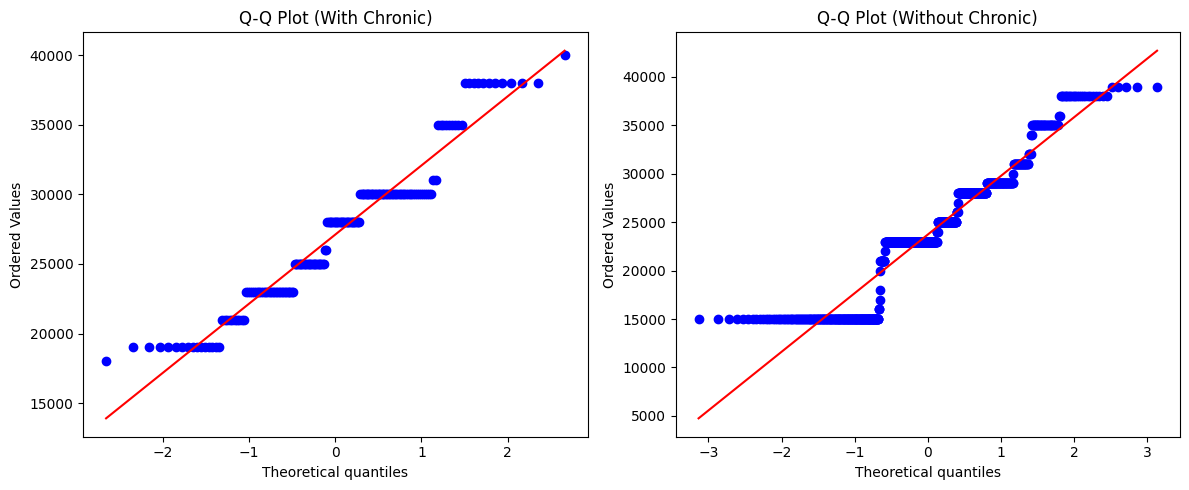

In [31]:
import scipy.stats as stats

# Q-Q plot for premium prices with Chronic
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)  # 1 row, 2 columns, 1st plot
stats.probplot(premium_with_Chronic, dist="norm", plot=plt)
plt.title('Q-Q Plot (With Chronic)')

# Q-Q plot for premium prices without Chronic
plt.subplot(1, 2, 2)  # 1 row, 2 columns, 2nd plot
stats.probplot(premium_without_Chronic, dist="norm", plot=plt)
plt.title('Q-Q Plot (Without Chronic)')

# Show the plots
plt.tight_layout()
plt.show()


In [32]:
from scipy.stats import shapiro

# Shapiro-Wilk test for premium prices with Chronic
shapiro_with_Chronic_statistic, shapiro_with_Chronic_pvalue = shapiro(premium_with_Chronic)
print("Shapiro-Wilk Test (With Chronic):", shapiro_with_Chronic_pvalue)

# Shapiro-Wilk test for premium prices without Chronic
shapiro_without_Chronic_statistic, shapiro_without_Chronic_pvalue=shapiro(premium_without_Chronic)
print("Shapiro-Wilk Test (Without Chronic):", shapiro_without_Chronic_pvalue)

if shapiro_with_Chronic_pvalue<0.05:
  print("Data is not normally distributed for Chronic patients")
else:
  print("Data is normally distributed for Chronic patients")
if shapiro_without_Chronic_pvalue<0.05:
  print("Data is not normally distributed for patients with No Chronic")
else:
  print("Data is normally distributed for patients with No Chronic")

Shapiro-Wilk Test (With Chronic): 9.100417476857392e-07
Shapiro-Wilk Test (Without Chronic): 1.6928145580704702e-21
Data is not normally distributed for Chronic patients
Data is not normally distributed for patients with No Chronic


In [33]:
from scipy.stats import mannwhitneyu
u_stat, p_value=mannwhitneyu(premium_with_Chronic,premium_without_Chronic)
if p_value<0.05:
  print("Reject Null Hypothesis. There is significant difference in premium price between Chronic patients and no Chronic patients")
else:
  print("Fail to Reject Null Hypothesis. There is no significant difference in premium price between Chronic patients and no Chronic patients")

Reject Null Hypothesis. There is significant difference in premium price between Chronic patients and no Chronic patients


In [34]:
from sklearn.linear_model import LinearRegression
import pandas as pd


X = df[['AnyChronicDiseases']]  # Independent variable (binary)
y = df['PremiumPrice']  # Dependent variable (premium price)

# Initialize model
model = LinearRegression()

# Fit model
model.fit(X, y)

# Get the coefficient (slope) for Chronic Disease
print(f"Coefficient for Chronic: {model.coef_}")

# Evaluate the model
y_pred = model.predict(X)
print(f"R^2 score: {model.score(X, y)}")


Coefficient for Chronic: [3387.11202581]
R^2 score: 0.04351807389555595


Interpretation:
The result shows that ChronicDisease might have a small effect on premium prices, but it is not a strong predictor.
The low R² score indicates that the relationship is weak and that other variables (which are not captured by this model) likely have a much larger influence on premium prices.

##KNOWN ALLERGY VS PREMIUM PRICE


*   box plot
*   checking normality of each category using: histogram/KDE plot, QQ plot
*   Statistical TesT






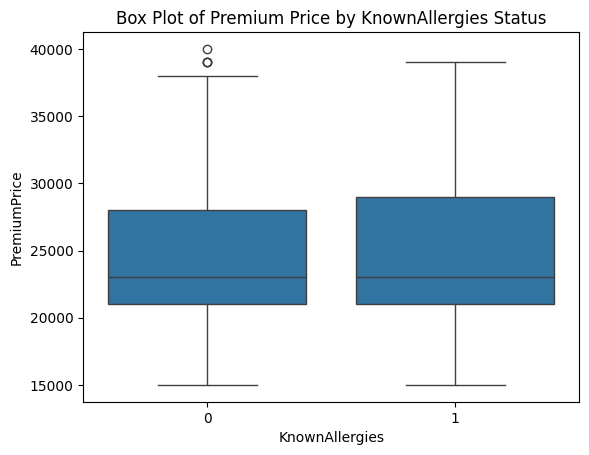

In [35]:
import seaborn as sns
import matplotlib.pyplot as plt
#plt.figure(figsize=(8, 6))
sns.boxplot(x='KnownAllergies', y='PremiumPrice', data=df)
plt.title('Box Plot of Premium Price by KnownAllergies Status')
plt.show()


In [36]:
premium_with_Allergy=df[df['KnownAllergies']==1]['PremiumPrice']
premium_without_Allergy=df[df['KnownAllergies']==0]['PremiumPrice']

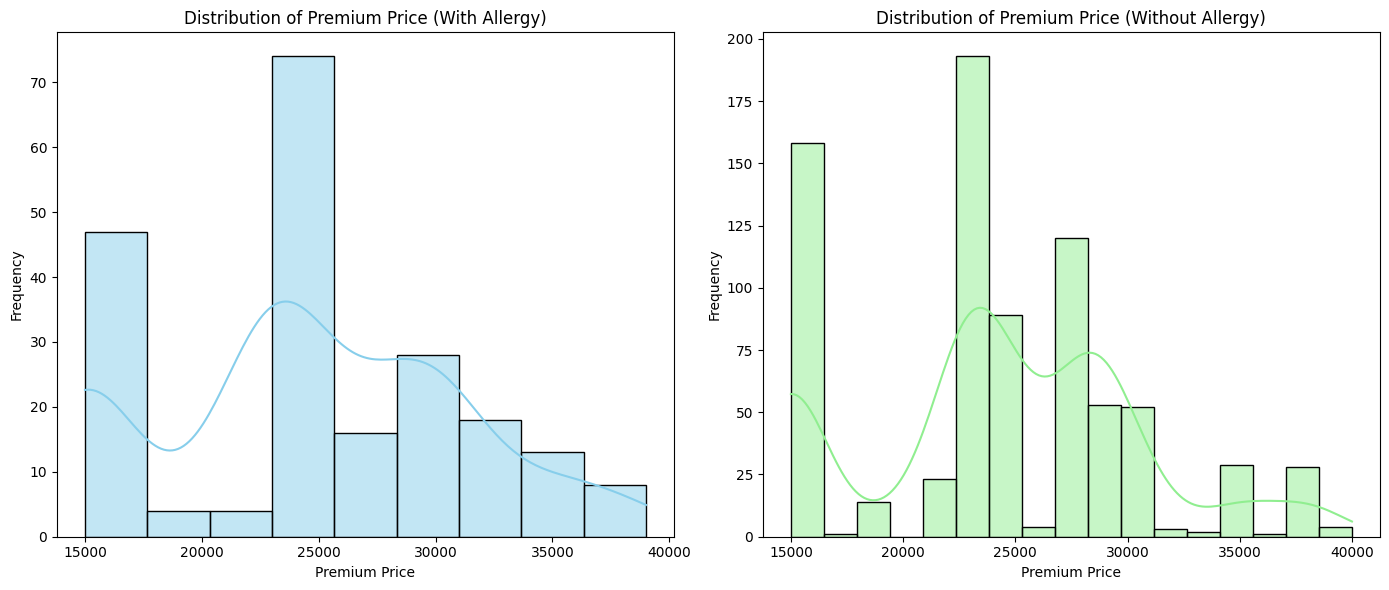

In [37]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the figure size
plt.figure(figsize=(14, 6))

# Plot histogram for premium prices with KnownAllergies
plt.subplot(1, 2, 1)  # 1 row, 2 columns, 1st plot
sns.histplot(premium_with_Allergy, kde=True, color='skyblue')
plt.title('Distribution of Premium Price (With Allergy)')
plt.xlabel('Premium Price')
plt.ylabel('Frequency')

# Plot histogram for premium prices without KnownAllergies
plt.subplot(1, 2, 2)  # 1 row, 2 columns, 2nd plot
sns.histplot(premium_without_Allergy, kde=True, color='lightgreen')
plt.title('Distribution of Premium Price (Without Allergy)')
plt.xlabel('Premium Price')
plt.ylabel('Frequency')

# Show the plots
plt.tight_layout()  # Adjusting subplots to fit into the figure area
plt.show()


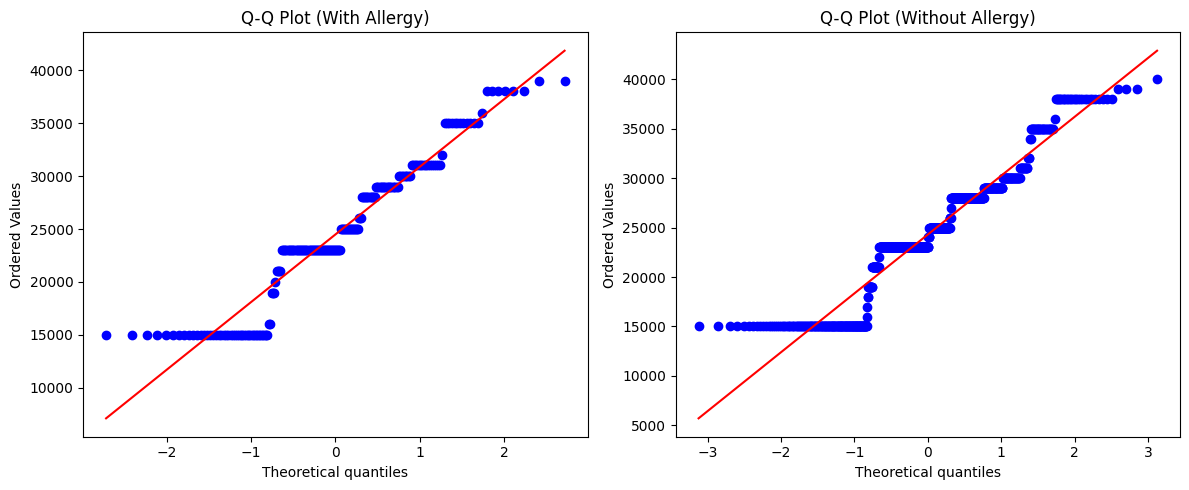

In [38]:
import scipy.stats as stats

# Q-Q plot for premium prices with KnownAllergies
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)  # 1 row, 2 columns, 1st plot
stats.probplot(premium_with_Allergy, dist="norm", plot=plt)
plt.title('Q-Q Plot (With Allergy)')

# Q-Q plot for premium prices without KnownAllergies
plt.subplot(1, 2, 2)  # 1 row, 2 columns, 2nd plot
stats.probplot(premium_without_Allergy, dist="norm", plot=plt)
plt.title('Q-Q Plot (Without Allergy)')

# Show the plots
plt.tight_layout()
plt.show()


In [39]:
from scipy.stats import shapiro

# Shapiro-Wilk test for premium prices with KnownAllergies
shapiro_with_Allergy_statistic, shapiro_with_Allergy_pvalue = shapiro(premium_with_Allergy)
print("Shapiro-Wilk Test (With Allergy):", shapiro_with_Allergy_pvalue)

# Shapiro-Wilk test for premium prices without KnownAllergies
shapiro_without_Allergy_statistic, shapiro_without_Allergy_pvalue=shapiro(premium_without_Allergy)
print("Shapiro-Wilk Test (Without Allergy):", shapiro_without_Allergy_pvalue)

if shapiro_with_Allergy_pvalue<0.05:
  print("Data is not normally distributed for Allergy patients")
else:
  print("Data is normally distributed for Allergy patients")
if shapiro_without_Allergy_pvalue<0.05:
  print("Data is not normally distributed for patients with No Allergy")
else:
  print("Data is normally distributed for patients with No Allergy")

Shapiro-Wilk Test (With Allergy): 9.135660153659199e-09
Shapiro-Wilk Test (Without Allergy): 3.4358371501181683e-19
Data is not normally distributed for Allergy patients
Data is not normally distributed for patients with No Allergy


In [40]:
from scipy.stats import mannwhitneyu
u_stat, p_value=mannwhitneyu(premium_with_Allergy,premium_without_Allergy)
if p_value<0.05:
  print("Reject Null Hypothesis. There is significant difference in premium price between Allergic patients and no Allergic patients")
else:
  print("Fail to Reject Null Hypothesis. There is no significant difference in premium price between Allergic patients and no Allergic patients")

Fail to Reject Null Hypothesis. There is no significant difference in premium price between Allergic patients and no Allergic patients


In [41]:
from sklearn.linear_model import LinearRegression
import pandas as pd

X = df[['KnownAllergies']]  # Independent variable (binary)
y = df['PremiumPrice']  # Dependent variable (premium price)

# Initialize model
model = LinearRegression()

# Fit model
model.fit(X, y)

# Get the coefficient (slope) for diabetes
print(f"Coefficient for KnownAllergies: {model.coef_}")

# Evaluate the model
y_pred = model.predict(X)
print(f"R^2 score: {model.score(X, y)}")


Coefficient for KnownAllergies: [183.97445273]
R^2 score: 0.00014647754134844426


Interpretation: An R² of 0.0001 suggests that the model explains almost none of the variability in the target. This could mean that the relationship between the features and the target may not be linear, or the feature set may not capture relevant patterns.

##HISTORY OF CANCER IN FAMILY VS PREMIUM PRICE


*   box plot
*   checking normality of each category using: histogram/KDE plot, QQ plot
*   Statistical TesT





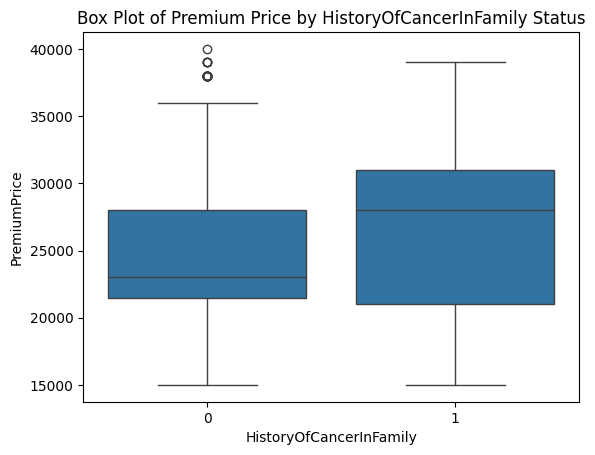

In [42]:
import seaborn as sns
import matplotlib.pyplot as plt
#plt.figure(figsize=(8, 6))
sns.boxplot(x='HistoryOfCancerInFamily', y='PremiumPrice', data=df)
plt.title('Box Plot of Premium Price by HistoryOfCancerInFamily Status')
plt.show()


In [43]:
premium_with_HistoryOfCancerInFamily=df[df['HistoryOfCancerInFamily']==1]['PremiumPrice']
premium_without_HistoryOfCancerInFamily=df[df['HistoryOfCancerInFamily']==0]['PremiumPrice']

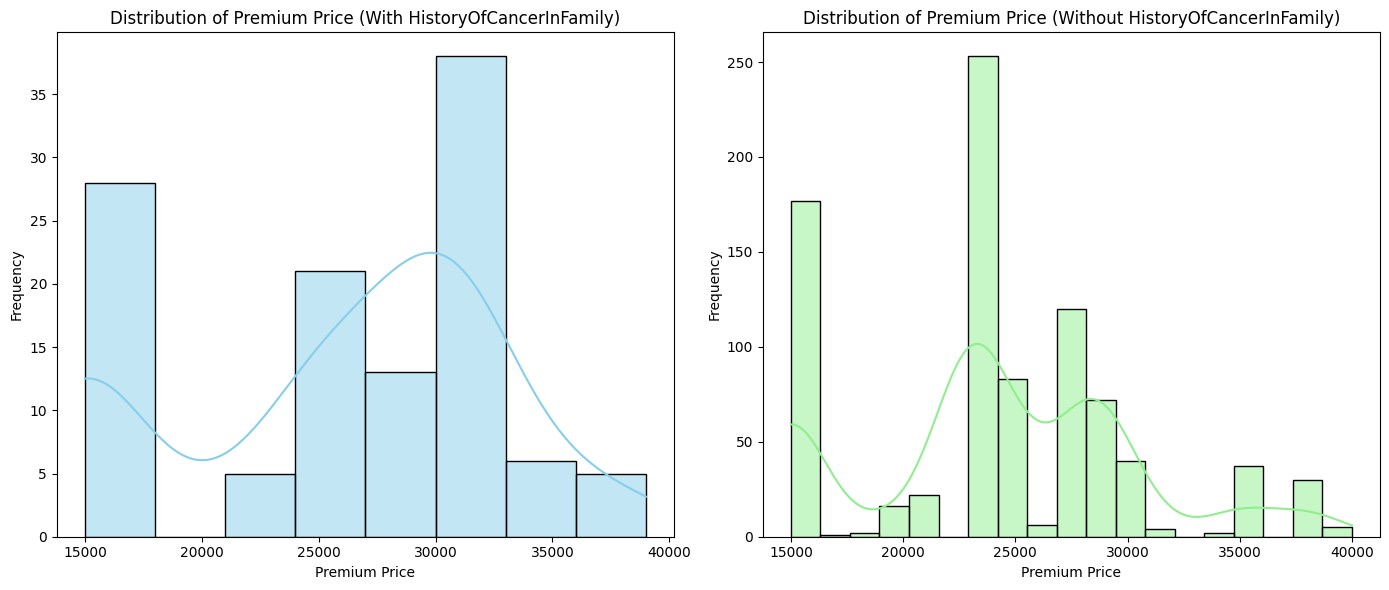

In [44]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the figure size
plt.figure(figsize=(14, 6))

# Plot histogram for premium prices with HistoryOfCancerInFamily
plt.subplot(1, 2, 1)  # 1 row, 2 columns, 1st plot
sns.histplot(premium_with_HistoryOfCancerInFamily, kde=True, color='skyblue')
plt.title('Distribution of Premium Price (With HistoryOfCancerInFamily)')
plt.xlabel('Premium Price')
plt.ylabel('Frequency')

# Plot histogram for premium prices without HistoryOfCancerInFamily
plt.subplot(1, 2, 2)  # 1 row, 2 columns, 2nd plot
sns.histplot(premium_without_HistoryOfCancerInFamily, kde=True, color='lightgreen')
plt.title('Distribution of Premium Price (Without HistoryOfCancerInFamily)')
plt.xlabel('Premium Price')
plt.ylabel('Frequency')

# Show the plots
plt.tight_layout()  # Adjusting subplots to fit into the figure area
plt.show()


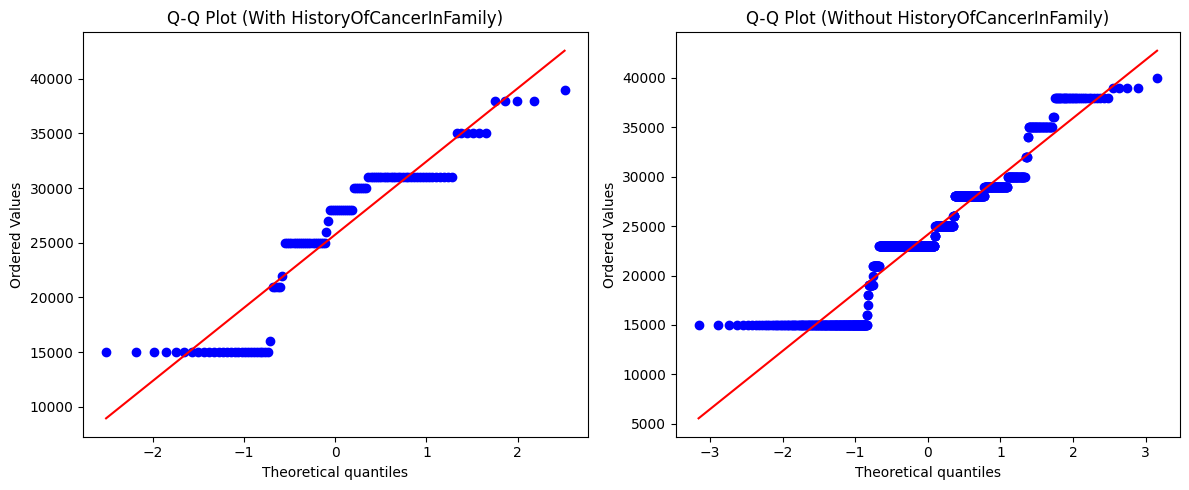

In [45]:
import scipy.stats as stats

# Q-Q plot for premium prices with HistoryOfCancerInFamily
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)  # 1 row, 2 columns, 1st plot
stats.probplot(premium_with_HistoryOfCancerInFamily, dist="norm", plot=plt)
plt.title('Q-Q Plot (With HistoryOfCancerInFamily)')

# Q-Q plot for premium prices without HistoryOfCancerInFamily
plt.subplot(1, 2, 2)  # 1 row, 2 columns, 2nd plot
stats.probplot(premium_without_HistoryOfCancerInFamily, dist="norm", plot=plt)
plt.title('Q-Q Plot (Without HistoryOfCancerInFamily)')

# Show the plots
plt.tight_layout()
plt.show()


In [46]:
from scipy.stats import shapiro

# Shapiro-Wilk test for premium prices with HistoryOfCancerInFamily
shapiro_with_HistoryOfCancerInFamily_statistic, shapiro_with_HistoryOfCancerInFamily_pvalue = shapiro(premium_with_HistoryOfCancerInFamily)
print("Shapiro-Wilk Test (With HistoryOfCancerInFamily):", shapiro_with_HistoryOfCancerInFamily_pvalue)

# Shapiro-Wilk test for premium prices without HistoryOfCancerInFamily
shapiro_without_HistoryOfCancerInFamily_statistic, shapiro_without_HistoryOfCancerInFamily_pvalue=shapiro(premium_without_HistoryOfCancerInFamily)
print("Shapiro-Wilk Test (Without HistoryOfCancerInFamily):", shapiro_without_HistoryOfCancerInFamily_pvalue)

if shapiro_with_HistoryOfCancerInFamily_pvalue<0.05:
  print("Data is not normally distributed for HistoryOfCancerInFamily patients")
else:
  print("Data is normally distributed for HistoryOfCancerInFamily patients")
if shapiro_without_HistoryOfCancerInFamily_pvalue<0.05:
  print("Data is not normally distributed for patients with No HistoryOfCancerInFamily")
else:
  print("Data is normally distributed for patients with No HistoryOfCancerInFamily")

Shapiro-Wilk Test (With HistoryOfCancerInFamily): 2.132109964796759e-08
Shapiro-Wilk Test (Without HistoryOfCancerInFamily): 6.217231149394338e-21
Data is not normally distributed for HistoryOfCancerInFamily patients
Data is not normally distributed for patients with No HistoryOfCancerInFamily


In [47]:
from scipy.stats import mannwhitneyu
u_stat, p_value=mannwhitneyu(premium_with_HistoryOfCancerInFamily,premium_without_HistoryOfCancerInFamily)
if p_value<0.05:
  print("Reject Null Hypothesis. There is significant difference in premium price between Cancer History patients and no Cancer History patients")
else:
  print("Fail to Reject Null Hypothesis. There is no significant difference in premium price between Cancer History patients and no Cancer history patients")

Reject Null Hypothesis. There is significant difference in premium price between Cancer History patients and no Cancer History patients


In [48]:
from sklearn.linear_model import LinearRegression
import pandas as pd


X = df[['HistoryOfCancerInFamily']]  # Independent variable (binary)
y = df['PremiumPrice']  # Dependent variable (premium price)

# Initialize model
model = LinearRegression()

# Fit model
model.fit(X, y)

# Get the coefficient (slope) for HistoryOfCancerInFamily
print(f"Coefficient for HistoryOfCancerInFamily: {model.coef_}")

# Evaluate the model
y_pred = model.predict(X)
print(f"R^2 score: {model.score(X, y)}")


Coefficient for HistoryOfCancerInFamily: [1611.49425287]
R^2 score: 0.006912162578684322


Interpretation: The result shows that History of cancer in family might have a small effect on premium prices, but it is not a strong predictor. The low R² score indicates that the relationship is weak and that other variables likely have a much larger influence on premium prices.

##NUMBER OF MAJOR SURGERIES VS PREMIUM PRICE

<ipython-input-49-355de6782b95>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='NumberOfMajorSurgeries', y='PremiumPrice', data=df, palette='viridis')


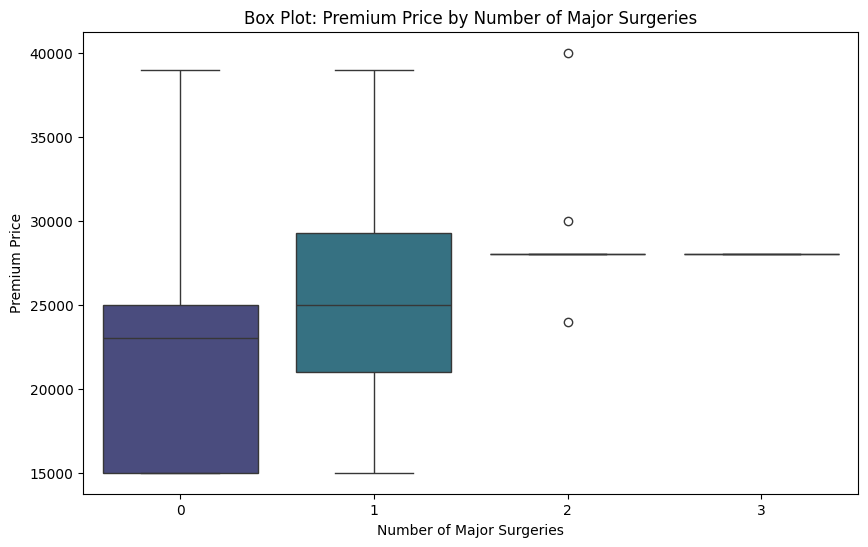

In [49]:
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.boxplot(x='NumberOfMajorSurgeries', y='PremiumPrice', data=df, palette='viridis')
plt.title('Box Plot: Premium Price by Number of Major Surgeries')
plt.xlabel('Number of Major Surgeries')
plt.ylabel('Premium Price')
plt.show()


In [50]:
premium_with_0_surgeries=df[df['NumberOfMajorSurgeries']==0]['PremiumPrice']
premium_with_1_surgeries=df[df['NumberOfMajorSurgeries']==1]['PremiumPrice']
premium_with_2_surgeries=df[df['NumberOfMajorSurgeries']==2]['PremiumPrice']
premium_with_3_surgeries=df[df['NumberOfMajorSurgeries']==3]['PremiumPrice']

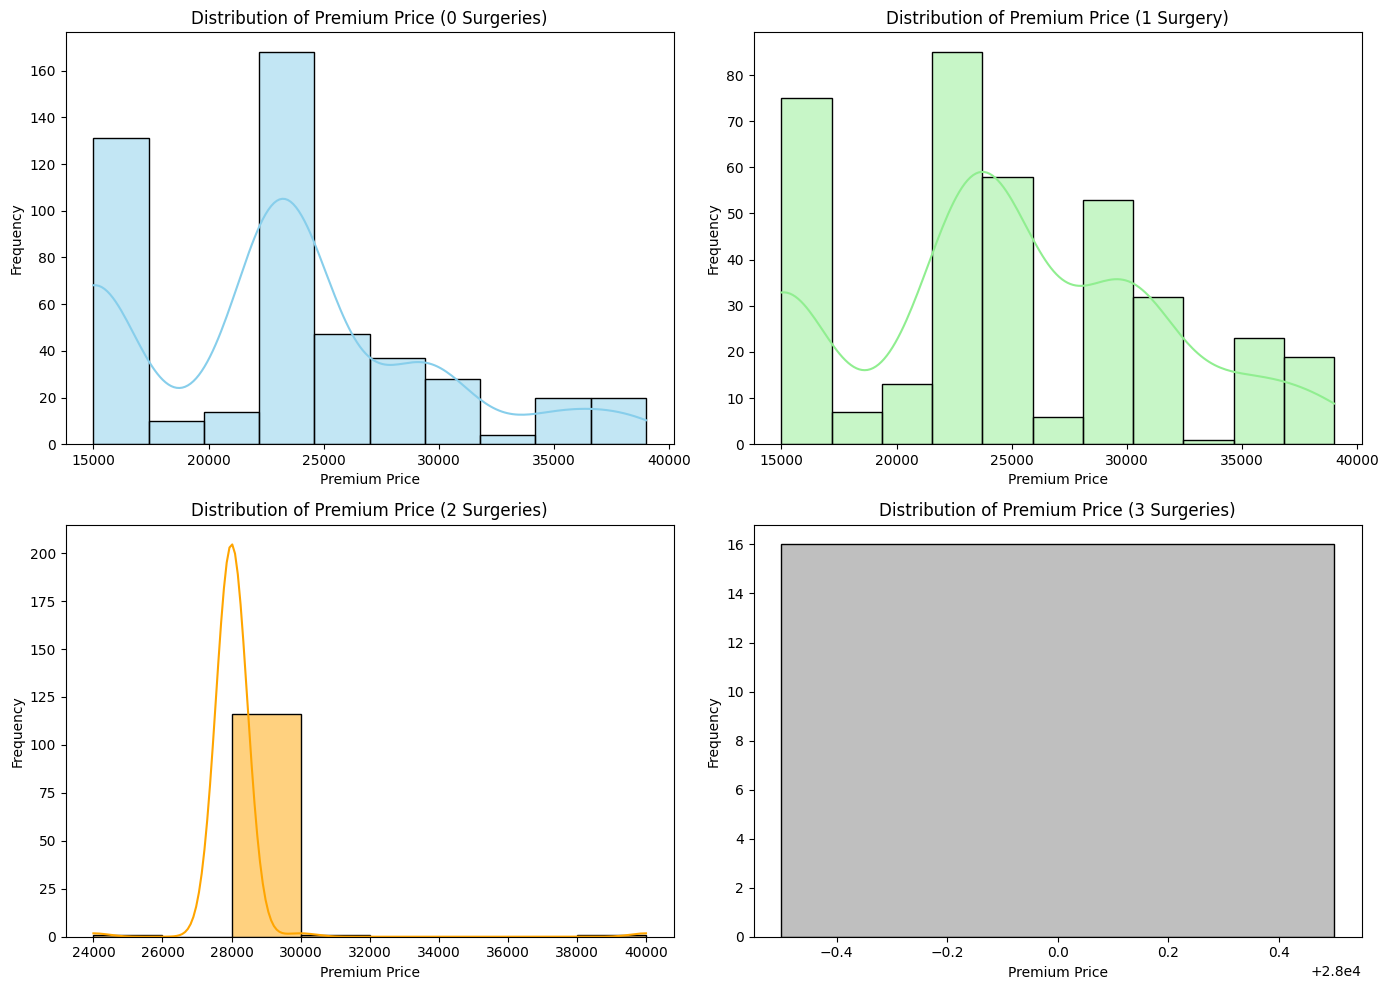

In [51]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the figure size
plt.figure(figsize=(14, 10))

# Adjust spacing between subplots
plt.subplots_adjust(hspace=0.4, wspace=0.3)

# Plot histogram for premium prices with 0 surgeries
plt.subplot(2, 2, 1)  # 2 rows, 2 columns, 1st plot
sns.histplot(premium_with_0_surgeries, kde=True, color='skyblue')
plt.title('Distribution of Premium Price (0 Surgeries)')
plt.xlabel('Premium Price')
plt.ylabel('Frequency')

# Plot histogram for premium prices with 1 surgery
plt.subplot(2, 2, 2)  # 2 rows, 2 columns, 2nd plot
sns.histplot(premium_with_1_surgeries, kde=True, color='lightgreen')
plt.title('Distribution of Premium Price (1 Surgery)')
plt.xlabel('Premium Price')
plt.ylabel('Frequency')

# Plot histogram for premium prices with 2 surgeries
plt.subplot(2, 2, 3)  # 2 rows, 2 columns, 3rd plot
sns.histplot(premium_with_2_surgeries, kde=True, color='orange')
plt.title('Distribution of Premium Price (2 Surgeries)')
plt.xlabel('Premium Price')
plt.ylabel('Frequency')

# Plot histogram for premium prices with 3 surgeries
plt.subplot(2, 2, 4)  # 2 rows, 2 columns, 4th plot
sns.histplot(premium_with_3_surgeries, kde=True, color='grey')
plt.title('Distribution of Premium Price (3 Surgeries)')
plt.xlabel('Premium Price')
plt.ylabel('Frequency')

# Adjust layout to fit all plots nicely
plt.tight_layout()
plt.show()


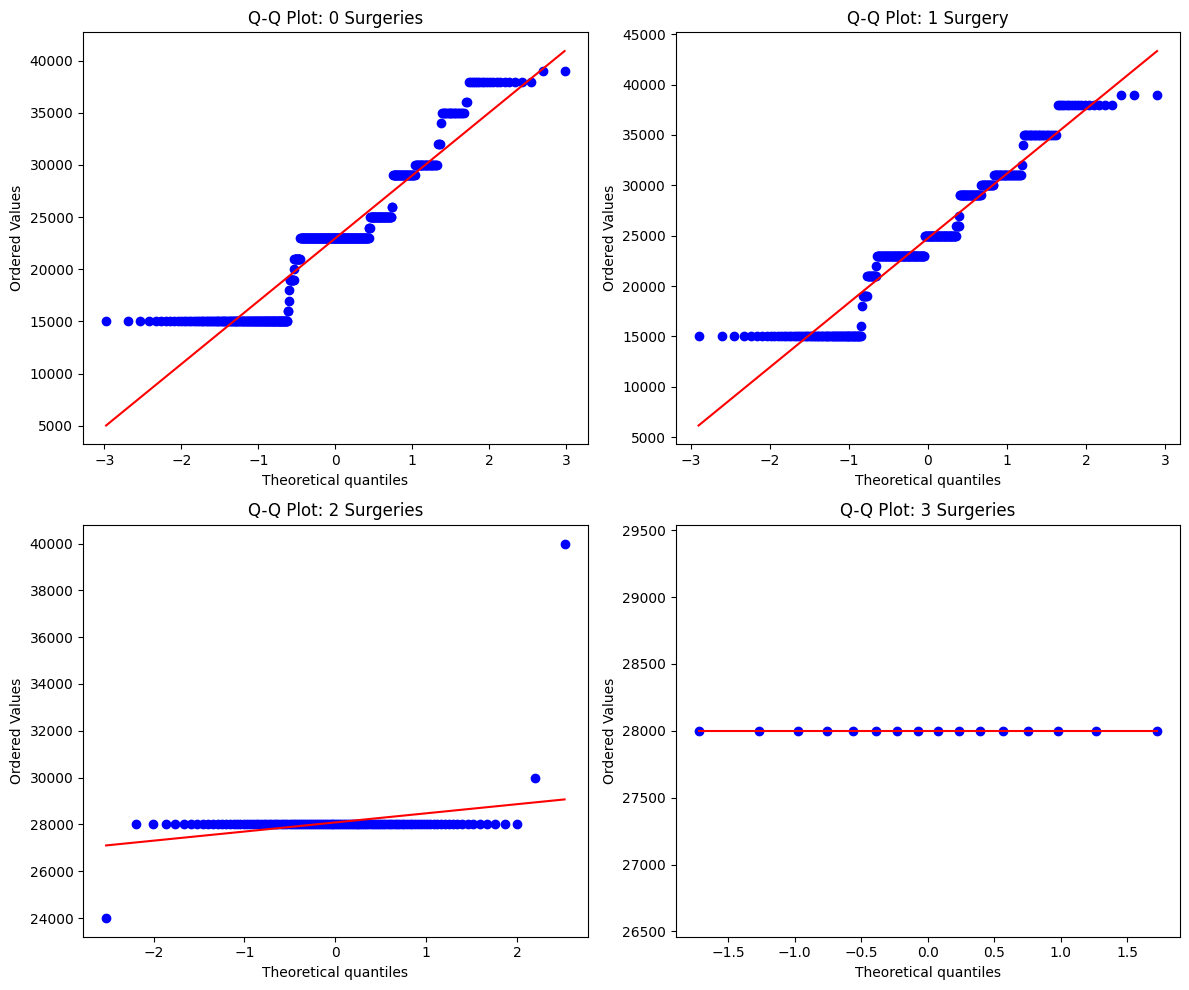

In [52]:
import matplotlib.pyplot as plt
import scipy.stats as stats

# Example data for four categories:
# premium_with_0_surgeries, premium_with_1_surgeries, premium_with_2_surgeries, premium_with_3_surgeries

plt.figure(figsize=(12, 10))
plt.subplots_adjust(hspace=0.4, wspace=0.3)

# Q-Q plot for premium_with_0_surgeries
plt.subplot(2, 2, 1)
stats.probplot(premium_with_0_surgeries, dist="norm", plot=plt)
plt.title("Q-Q Plot: 0 Surgeries")

# Q-Q plot for premium_with_1_surgeries
plt.subplot(2, 2, 2)
stats.probplot(premium_with_1_surgeries, dist="norm", plot=plt)
plt.title("Q-Q Plot: 1 Surgery")

# Q-Q plot for premium_with_2_surgeries
plt.subplot(2, 2, 3)
stats.probplot(premium_with_2_surgeries, dist="norm", plot=plt)
plt.title("Q-Q Plot: 2 Surgeries")

# Q-Q plot for premium_with_3_surgeries
plt.subplot(2, 2, 4)
stats.probplot(premium_with_3_surgeries, dist="norm", plot=plt)
plt.title("Q-Q Plot: 3 Surgeries")

plt.tight_layout()
plt.show()


In [53]:
from scipy.stats import shapiro

# Shapiro-Wilk test for premium prices with diabetes
shapiro_with_0_statistic, shapiro_with_0_pvalue = shapiro(premium_with_0_surgeries)
print("Shapiro-Wilk Test (With premium_with_0_surgeries):", shapiro_with_0_pvalue)

# Shapiro-Wilk test for premium prices without diabetes
shapiro_with_1_statistic, shapiro_with_1_pvalue = shapiro(premium_with_1_surgeries)
print("Shapiro-Wilk Test (With premium_with_1_surgeries):", shapiro_with_1_pvalue)

shapiro_with_2_statistic, shapiro_with_2_pvalue = shapiro(premium_with_2_surgeries)
print("Shapiro-Wilk Test (With premium_with_2_surgeries):", shapiro_with_2_pvalue)

shapiro_with_3_statistic, shapiro_with_3_pvalue = shapiro(premium_with_3_surgeries)
print("Shapiro-Wilk Test (With premium_with_3_surgeries):", shapiro_with_3_pvalue)

if shapiro_with_0_pvalue<0.05:
  print("Data is not normally distributed for 0 surgery patients")
else:
  print("Data is normally distributed for 0 surgery patients")

if shapiro_with_1_pvalue<0.05:
  print("Data is not normally distributed for 1 surgery patients")
else:
  print("Data is normally distributed for 1 surgery patients")

if shapiro_with_2_pvalue<0.05:
  print("Data is not normally distributed for 2 surgery patients")
else:
  print("Data is normally distributed for 2 surgery patients")

if shapiro_with_3_pvalue<0.05:
  print("Data is not normally distributed for 3 surgery patients")
else:
  print("Data is normally distributed for 3 surgery patients")

Shapiro-Wilk Test (With premium_with_0_surgeries): 3.901965395277343e-18
Shapiro-Wilk Test (With premium_with_1_surgeries): 4.194464670933881e-12
Shapiro-Wilk Test (With premium_with_2_surgeries): 1.8090482740166476e-23
Shapiro-Wilk Test (With premium_with_3_surgeries): 1.0
Data is not normally distributed for 0 surgery patients
Data is not normally distributed for 1 surgery patients
Data is not normally distributed for 2 surgery patients
Data is normally distributed for 3 surgery patients


/usr/local/lib/python3.10/dist-packages/scipy/stats/_axis_nan_policy.py:531: UserWarning: scipy.stats.shapiro: Input data has range zero. The results may not be accurate.
  res = hypotest_fun_out(*samples, **kwds)


In [54]:
from scipy.stats import kruskal

# Perform Kruskal-Wallis H-test
stat, p_value = kruskal(premium_with_0_surgeries, premium_with_1_surgeries, premium_with_2_surgeries, premium_with_3_surgeries)

print("Kruskal-Wallis Test Statistic:", stat)
print("p-value:", p_value)

# Interpretation
if p_value < 0.05:
    print("Significant difference in premium prices among the surgery groups.")
else:
    print("No significant difference in premium prices among the surgery groups.")


Kruskal-Wallis Test Statistic: 93.81277073618764
p-value: 3.3223412749827346e-20
Significant difference in premium prices among the surgery groups.


In [55]:
from sklearn.linear_model import LinearRegression
import pandas as pd


X = df[['NumberOfMajorSurgeries']]  # Independent variable (binary)
y = df['PremiumPrice']  # Dependent variable (premium price)

# Initialize model
model = LinearRegression()

# Fit model
model.fit(X, y)

# Get the coefficient (slope) for NumberOfMajorSurgeries
print(f"Coefficient for NumberOfMajorSurgeries: {model.coef_}")

# Evaluate the model
y_pred = model.predict(X)
print(f"R^2 score: {model.score(X, y)}")


Coefficient for NumberOfMajorSurgeries: [2203.77585536]
R^2 score: 0.06982781376561642


Interpretation: The result shows that Number of major surgeries  might have a small effect on premium prices, but it is not a strong predictor. The low R² score indicates that the relationship is weak and that other variables likely have a much larger influence on premium prices.

##AGE AND PREMIUM PRICE

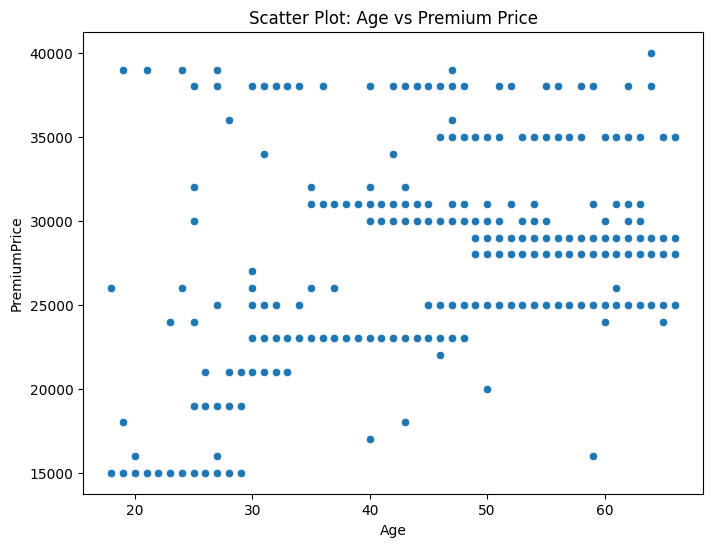

In [58]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create a scatter plot
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Age', y='PremiumPrice', data=df)
plt.title('Scatter Plot: Age vs Premium Price')
plt.xlabel('Age')
plt.ylabel('PremiumPrice')
plt.show()


In [59]:
# Calculate the correlation coefficient
correlation = df['Age'].corr(df['PremiumPrice'])
print(f'Pearson correlation coefficient: {correlation}')


Pearson correlation coefficient: 0.6975399655058029


Interpret: A Pearson correlation of 0.6975 suggests that the two variables are positively correlated in a moderately strong way

## HEIGHT VS PREMIUM PRICE

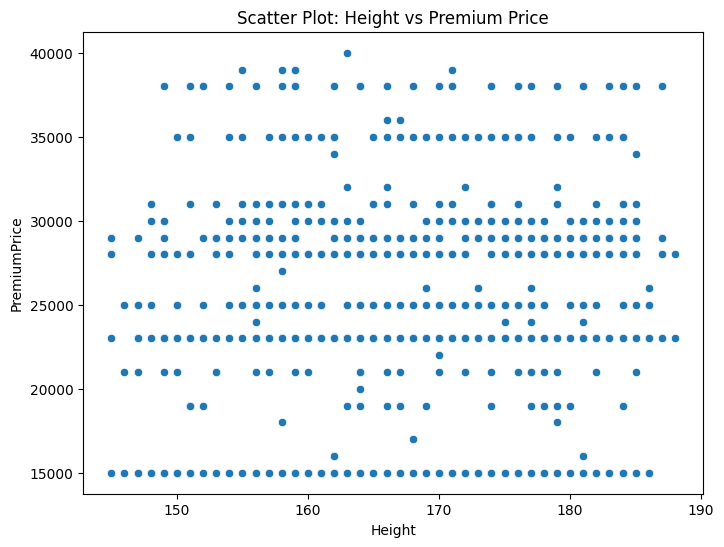

In [60]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create a scatter plot
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Height', y='PremiumPrice', data=df)
plt.title('Scatter Plot: Height vs Premium Price')
plt.xlabel('Height')
plt.ylabel('PremiumPrice')
plt.show()


In [61]:
# Calculate the correlation coefficient
correlation = df['Height'].corr(df['PremiumPrice'])
print(f'Pearson correlation coefficient: {correlation}')


Pearson correlation coefficient: 0.026909513982140008


Interpretation: In practical terms, Height is unlikely to be useful as a predictor of PremiumPrice in a model, since it does not show any meaningful linear relationship.


##WEIGHT VS PREMIUMPRICE

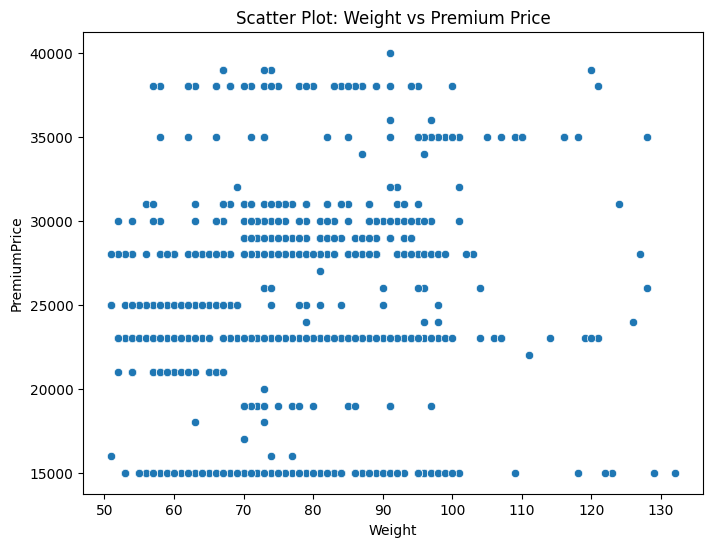

In [62]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create a scatter plot
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Weight', y='PremiumPrice', data=df)
plt.title('Scatter Plot: Weight vs Premium Price')
plt.xlabel('Weight')
plt.ylabel('PremiumPrice')
plt.show()


In [63]:
# Calculate the correlation coefficient
correlation = df['Weight'].corr(df['PremiumPrice'])
print(f'Pearson correlation coefficient: {correlation}')


Pearson correlation coefficient: 0.14150740525639752


Interpretation: Since the correlation is positive, there’s a slight tendency for PremiumPrice to rise with Weight, but this association is weak and likely not reliable as a sole predictor.In predictive modeling, Weight might add minor value to a model but would likely need to be combined with other features to improve predictive accuracy.


##Multicolinearity check

In [64]:
df_encoding = pd.get_dummies(df, drop_first=True)
corr_matrix = df_encoding.corr()
df_encoding

,Age,Diabetes,BloodPressureProblems,AnyTransplants,AnyChronicDiseases,Height,Weight,KnownAllergies,HistoryOfCancerInFamily,NumberOfMajorSurgeries,PremiumPrice,BMI
0,45,0,0,0,0,155,57,0,0,0,25000,23.725286
1,60,1,0,0,0,180,73,0,0,0,29000,22.530864
2,36,1,1,0,0,158,59,0,0,1,23000,23.634033
3,52,1,1,0,1,183,93,0,0,2,28000,27.770313
4,38,0,0,0,1,166,88,0,0,1,23000,31.934969
...,...,...,...,...,...,...,...,...,...,...,...,...
981,18,0,0,0,0,169,67,0,0,0,15000,23.458562
982,64,1,1,0,0,153,70,0,0,3,28000,29.903029
983,56,0,1,0,0,155,71,0,0,1,29000,29.552549
984,47,1,1,0,0,158,73,1,0,1,39000,29.242109


In [65]:
import pandas as pd

# Calculate the correlation matrix
#corr_matrix = X.corr().abs()

# Find pairs with correlation above 0.8
high_corr_pairs = [(col1, col2, corr_matrix.loc[col1, col2])
                   for col1 in corr_matrix.columns
                   for col2 in corr_matrix.columns
                   if col1 != col2 and corr_matrix.loc[col1, col2] > 0.8]

# Convert to DataFrame for readability
high_corr_df = pd.DataFrame(high_corr_pairs, columns=['Feature 1', 'Feature 2', 'Correlation'])
print(high_corr_df)


  Feature 1 Feature 2  Correlation
0    Weight       BMI     0.820679
1       BMI    Weight     0.820679


In [66]:
from sklearn.preprocessing import PolynomialFeatures

# Select a subset of features for interaction and polynomial terms
interaction_features = df[['BMI', 'Age', 'NumberOfMajorSurgeries']]
poly = PolynomialFeatures(degree=2, interaction_only=False, include_bias=False)
poly_features = poly.fit_transform(interaction_features)

# Convert polynomial features to a DataFrame and concatenate with the original dataset
poly_features_df = pd.DataFrame(poly_features, columns=poly.get_feature_names_out(interaction_features.columns))
data_with_poly = pd.concat([df, poly_features_df], axis=1)

# Drop any redundant original columns if necessary (optional)
data_with_poly = data_with_poly.drop(columns=['BMI', 'Age', 'NumberOfMajorSurgeries'])


In [67]:
data_with_poly

,Diabetes,BloodPressureProblems,AnyTransplants,AnyChronicDiseases,Height,Weight,KnownAllergies,HistoryOfCancerInFamily,PremiumPrice,BMI^2,BMI Age,BMI NumberOfMajorSurgeries,Age^2,Age NumberOfMajorSurgeries,NumberOfMajorSurgeries^2
0,0,0,0,0,155,57,0,0,25000,562.889203,1067.637877,0.000000,2025.0,0.0,0.0
1,1,0,0,0,180,73,0,0,29000,507.639841,1351.851852,0.000000,3600.0,0.0,0.0
2,1,1,0,0,158,59,0,0,23000,558.567516,850.825188,23.634033,1296.0,36.0,1.0
3,1,1,0,1,183,93,0,0,28000,771.190264,1444.056257,55.540625,2704.0,104.0,4.0
4,0,0,0,1,166,88,0,0,23000,1019.842232,1213.528814,31.934969,1444.0,38.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
981,0,0,0,0,169,67,0,0,15000,550.304149,422.254123,0.000000,324.0,0.0,0.0
982,1,1,0,0,153,70,0,0,28000,894.191128,1913.793840,89.709086,4096.0,192.0,9.0
983,0,1,0,0,155,71,0,0,29000,873.353178,1654.942768,29.552549,3136.0,56.0,1.0
984,1,1,0,0,158,73,1,0,39000,855.100918,1374.379106,29.242109,2209.0,47.0,1.0


In [68]:
from sklearn.linear_model import Ridge, Lasso
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# Define target and features with new engineered features
X = data_with_poly.drop(columns=['PremiumPrice'])
y = data_with_poly['PremiumPrice']

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize Ridge or Lasso (try different alpha values to find the best)
model = Ridge(alpha=1.0)  # or Lasso(alpha=0.1)
#model = Lasso(alpha=0.1)
model.fit(X_train, y_train)

# Evaluate the model
predictions = model.predict(X_test)
print("RMSE:", mean_squared_error(y_test, predictions, squared=False))
print("R^2 Score:", r2_score(y_test, predictions))


RMSE: 3498.9903098441205
R^2 Score: 0.7128955975246749


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [69]:
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Predictions and Evaluation
predictions = model.predict(X_test)
print("RMSE:", mean_squared_error(y_test, predictions, squared=False))
print("R^2 Score:", r2_score(y_test, predictions))


RMSE: 2154.906194494486
R^2 Score: 0.8911042045307722


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [70]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10]
}
grid_search = GridSearchCV(RandomForestRegressor(random_state=42), param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)

best_model = grid_search.best_estimator_
predictions = best_model.predict(X_test)
print("Best RMSE:", mean_squared_error(y_test, predictions, squared=False))
print("Best R^2 Score:", r2_score(y_test, predictions))


Best RMSE: 2120.5537410968436
Best R^2 Score: 0.8945484569552926


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


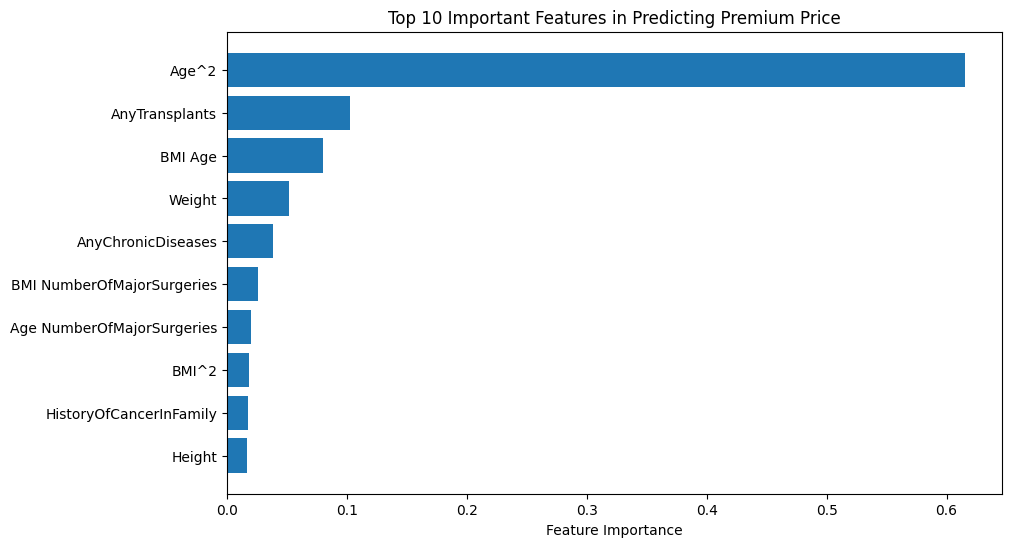

In [71]:
import matplotlib.pyplot as plt
importances = best_model.feature_importances_
feature_names = X_train.columns

# Create a DataFrame to hold feature names and their importance scores
feature_importance_df = pd.DataFrame({'feature': feature_names, 'importance': importances})
feature_importance_df = feature_importance_df.sort_values(by='importance', ascending=False)

# Plot the top features
plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df['feature'][:10], feature_importance_df['importance'][:10])
plt.gca().invert_yaxis()
plt.xlabel("Feature Importance")
plt.title("Top 10 Important Features in Predicting Premium Price")
plt.show()


In [72]:
#from sklearn.ensemble import GradientBoostingRegressor, VotingRegressor

# Initialize Gradient Boosting model
#gb_model = GradientBoostingRegressor(n_estimators=100, random_state=42)

# Create a Voting Regressor
#ensemble_model = VotingRegressor([('rf', best_model), ('gb', gb_model)])
#ensemble_model.fit(X_train, y_train)

# Evaluate the ensemble model
#ensemble_predictions = ensemble_model.predict(X_test)
#print("Ensemble RMSE:", mean_squared_error(y_test, ensemble_predictions, squared=False))
#print("Ensemble R^2 Score:", r2_score(y_test, ensemble_predictions))


In [73]:
#import joblib

# Save the model to a file
#joblib.dump(ensemble_model, 'premium_price_model.pkl')

# Load the model (for future predictions)
# loaded_model = joblib.load('premium_price_model.pkl')
# predictions = loaded_model.predict(new_data)


In [74]:
import joblib

# Save the model to a file
joblib.dump(best_model, 'premium_price_model_2.pkl')

# Load the model (for future predictions)
# loaded_model = joblib.load('premium_price_model.pkl')
# predictions = loaded_model.predict(new_data)


['premium_price_model_2.pkl']